When (which hour) do most 'LONG', 'SHORT', 'MEDIUM' haul flights take off

In [1]:
#Import all necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load the data
flights_task8 = pd.read_csv('data/time_fixedrow.csv')
flights_task8['dep_time_format'] = pd.to_datetime(flights_task8['dep_time_format']).drop(columns=['Unnamed: 0'])
flights_task8['arrival_time_format'] = pd.to_datetime(flights_task8['arrival_time_format'])

In [3]:
flights_short = flights_task8.loc[flights_task8['air_time'] <= 180]
flights_med = flights_task8.loc[(flights_task8['air_time'] >= 180) & flights_task8['air_time'] <= 360]
flights_long = flights_task8.loc[flights_task8['air_time'] >= 360]

In [4]:
short_flights_time = flights_short.groupby(by=[flights_short.dep_time_format.map(lambda x:(x.hour))])['taxi_out'].count().sort_values(ascending=False)
med_flights_time = flights_med.groupby(by=[flights_med.dep_time_format.map(lambda x:(x.hour))])['taxi_out'].count().sort_values(ascending=False)
long_flights_time = flights_long.groupby(by=[flights_med.dep_time_format.map(lambda x:(x.hour))])['taxi_out'].count().sort_values(ascending=False)

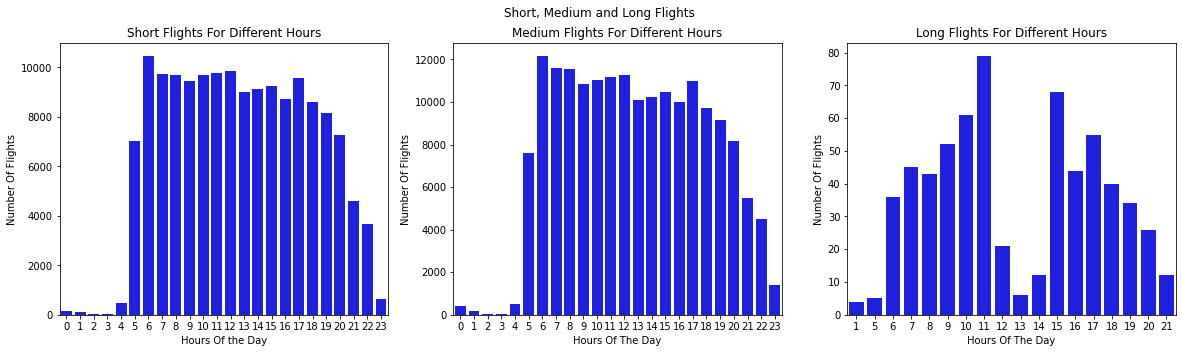

In [7]:
#plotting each flight
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
fig.suptitle('Short, Medium and Long Flights')

#Short FLights
sns.barplot(ax=axes[0], x=short_flights_time.index, y=short_flights_time.values,color='b')
axes[0].set_title('Short Flights For Different Hours')
axes[0].set_xlabel('Hours Of the Day')
axes[0].set_ylabel('Number Of Flights')
#Medium Flights
sns.barplot(ax=axes[1], x=med_flights_time.index, y=med_flights_time.values,color='b')
axes[1].set_title('Medium Flights For Different Hours')
axes[1].set_xlabel('Hours Of The Day')
axes[1].set_ylabel('Number Of Flights')
#lONG Flights
sns.barplot(ax=axes[2],x=long_flights_time.index, y=long_flights_time.values,color='b')
axes[2].set_title('Long Flights For Different Hours')
axes[2].set_xlabel('Hours Of The Day')
axes[2].set_ylabel('Number Of Flights')
plt.show()